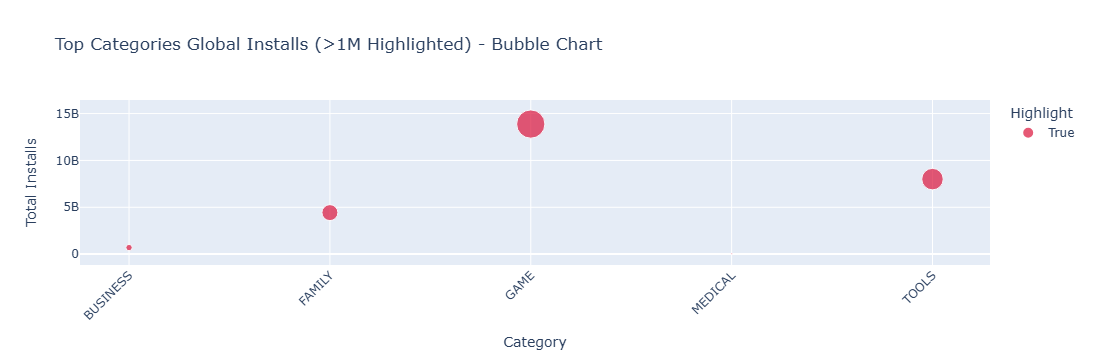

In [5]:
import pandas as pd
import plotly.express as px

# -------------------- LOAD DATASET --------------------
file_path = r"C:\Users\user\Downloads\Google Playstore Apps.csv"
df = pd.read_csv(file_path)

# -------------------- CLEANING --------------------
df = df.drop_duplicates(subset="App", keep="first")
df["Installs"] = df["Installs"].astype(str).str.replace("+","",regex=False).str.replace(",","",regex=False)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")
df["Category"] = df["Category"].astype(str)

# -------------------- TOP 5 CATEGORIES --------------------
cat_counts = df["Category"].value_counts()
top5 = cat_counts.head(5).index.tolist()

# Filter dataset to top 5 categories
filtered = df[df["Category"].isin(top5)]

# Aggregate installs by Category
agg_df = filtered.groupby("Category")["Installs"].sum().reset_index()

# Highlight categories with installs > 1M
agg_df["Highlight"] = agg_df["Installs"] > 1_000_000

# -------------------- BUBBLE CHART --------------------
fig = px.scatter(
    agg_df,
    x="Category",
    y="Installs",
    size="Installs",
    color="Highlight",
    color_discrete_map={True:"crimson", False:"skyblue"},
    hover_data={"Installs":True, "Category":True},
    title="Top Categories Global Installs (>1M Highlighted) - Bubble Chart"
)

fig.update_layout(
    yaxis_title="Total Installs",
    xaxis_title="Category",
    xaxis_tickangle=-45
)

fig.show()